In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
advertising = pd.read_csv('../../advertising.csv')
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
advertising = (advertising - advertising.mean())/advertising.std()
advertising

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
195,-1.267759,-1.317724,-0.769287,-1.230964
196,-0.615491,-1.236899,-1.031011,-0.828469
197,0.348934,-0.940539,-1.109069,-0.234310
198,1.590574,1.261955,1.636743,2.199827


In [9]:
# Assigning feature variable X
X = advertising[['TV','Radio', 'Newspaper']]

# Assigning response variable y
y = advertising['Sales']

In [10]:
X.head()

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


In [11]:
y.head()

0    1.548168
1   -0.694304
2   -0.905135
3    0.858177
4   -0.215143
Name: Sales, dtype: float64

In [12]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['Intercept'] = 1
X = X.reindex(['Intercept','TV','Radio', 'Newspaper'], axis=1)
X.head()

,Intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [13]:
# Convert X and y to arrays
X = np.array(X)
y = np.array(y)

In [23]:
# Theta is the vector representing coefficients ('Intercept','TV','Radio', 'Newspaper)
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

In [16]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [17]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [19]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_rss = gradient_descent_multi(X, y, theta, alpha, iterations)
gradient_descent_rss

,Bets,cost
0,"[-5.151434834260726e-18, 0.007783133027372985,...",0.487696
1,"[-1.021405182655144e-17, 0.015484416820036633,...",0.478118
2,"[-1.5365486660812166e-17, 0.023104730166288424...",0.468760
3,"[-2.0250467969162856e-17, 0.03064494219118504,...",0.459617
4,"[-2.4513724383723456e-17, 0.03810591246562723,...",0.450683
...,...,...
995,"[2.774447338538275e-16, 0.7530275184009089, 0....",0.051138
996,"[2.776889829192451e-16, 0.7530278865846947, 0....",0.051138
997,"[2.77422529393335e-16, 0.7530282512106896, 0.5...",0.051138
998,"[2.7755575615629e-16, 0.7530286123134639, 0.53...",0.051138


<AxesSubplot:xlabel='index'>

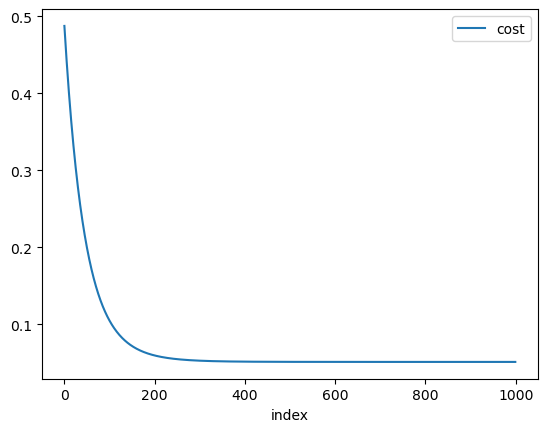

In [22]:
gradient_descent_rss.reset_index().plot.line(x='index', y=['cost'])